In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [9]:
# Define database connection parameters
database_params = {
    'user': 'postgres',                   # Update with individual user name
    'password': 'Connor1818!',            # Update with individual password
    'host': 'localhost',
    'port': '5432',
    'database': 'CreditCardTransactions'  # Update with your actual database name
}

# Construct the connection string
connection_string = f"postgresql://{database_params['user']}:{database_params['password']}@{database_params['host']}:{database_params['port']}/{database_params['database']}"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Define the table name
table_name = 'creditcardtransactions'

# Query all data from the table into a pandas DataFrame
creditcard_df = pd.read_sql(f'SELECT * FROM {table_name}', engine)

# Cleaning
creditcard_df2 = creditcard_df.apply(pd.to_numeric, errors='coerce')
creditcard_df2 = creditcard_df2.dropna()
 
# Display df
creditcard_df2.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [10]:
# Display df info
creditcard_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   v1      568630 non-null  float64
 2   v2      568630 non-null  float64
 3   v3      568630 non-null  float64
 4   v4      568630 non-null  float64
 5   v5      568630 non-null  float64
 6   v6      568630 non-null  float64
 7   v7      568630 non-null  float64
 8   v8      568630 non-null  float64
 9   v9      568630 non-null  float64
 10  v10     568630 non-null  float64
 11  v11     568630 non-null  float64
 12  v12     568630 non-null  float64
 13  v13     568630 non-null  float64
 14  v14     568630 non-null  float64
 15  v15     568630 non-null  float64
 16  v16     568630 non-null  float64
 17  v17     568630 non-null  float64
 18  v18     568630 non-null  float64
 19  v19     568630 non-null  float64
 20  v20     568630 non-null  float64
 21  v21     56

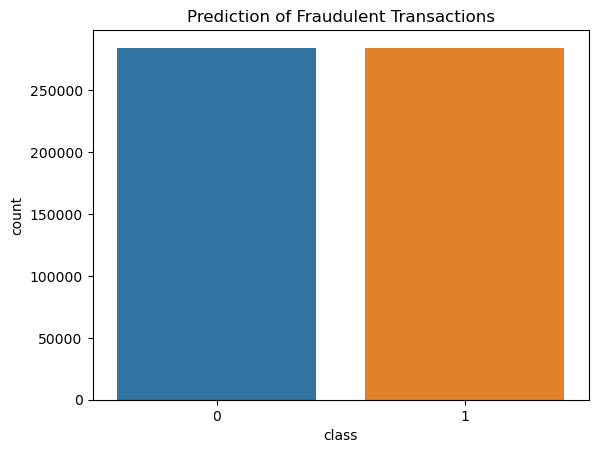

Max Iterations: 100
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56734
           1       1.00      1.00      1.00     56992

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Accuracy: 0.9983556970261858
Confusion Matrix:
[[56669    65]
 [  122 56870]]

Max Iterations: 500
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56734
           1       1.00      1.00      1.00     56992

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Accuracy: 0.9983556970261858
Confusion Matrix:
[[56669    65]
 [  122 56870]]

Max Iterations: 1000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56734
           1      

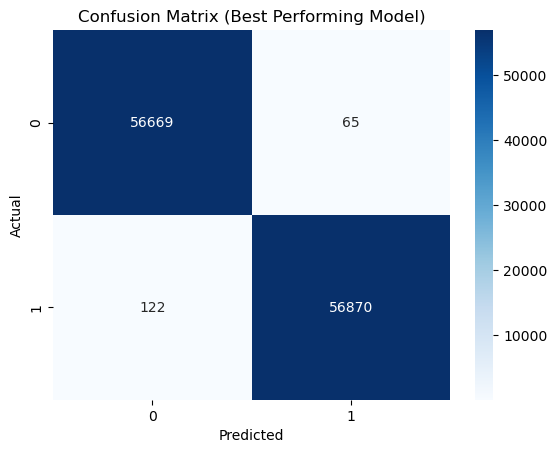

In [12]:
# Check the distribution of the target variable (class)
sns.countplot(x = 'class', data = creditcard_df2)
plt.title('Prediction of Fraudulent Transactions')
plt.show()

# Split the data into features (X) and target variable (y)
X = creditcard_df2.drop('class', axis=1)
y = creditcard_df2['class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialise lists to store optimisation results
accuracy_list = []
conf_matrix_list = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform model optimization
for max_iter in [100, 500, 1000]:
    
    # Build a logistic regression model
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = model.score(X_test, y_test)
    accuracy_list.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_list.append(conf_matrix)

    print(f"Max Iterations: {max_iter}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

# Display overall model performance
best_max_iter = [100, 500, 1000][accuracy_list.index(max(accuracy_list))]
print(f"Best Max Iterations: {best_max_iter}")
print("Overall Model Performance:")
print(classification_report(y_test, model.predict(X_test)))
print(f"Overall Accuracy: {max(accuracy_list)}")
print(f"Overall Confusion Matrix:\n{conf_matrix_list[accuracy_list.index(max(accuracy_list))]}")

# Plot confusion matrix of the best performing model
plt.figure()
sns.heatmap(conf_matrix_list[accuracy_list.index(max(accuracy_list))], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Performing Model)')
plt.show()

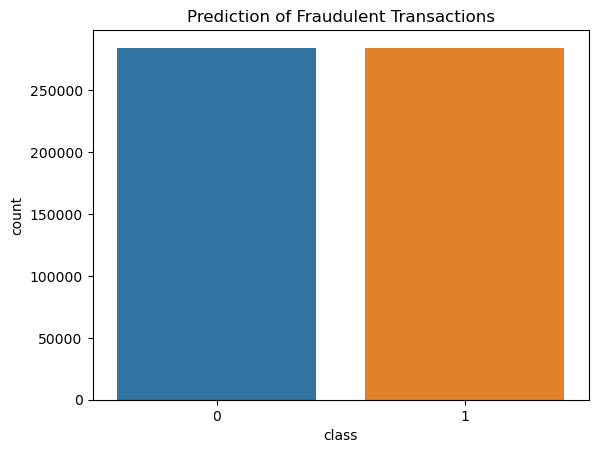

In [13]:
# Check the distribution of the target variable (class)
sns.countplot(x = 'class', data = creditcard_df2)
plt.title('Prediction of Fraudulent Transactions')
plt.show()

In [14]:
# Split the data into features (X) and target variable (y)
X = creditcard_df2.drop('class', axis=1)
y = creditcard_df2['class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialise lists to store optimisation results
accuracy_list = []
conf_matrix_list = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform model optimization
for max_iter in [100, 500, 1000]:
    
    # Build a logistic regression model
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = model.score(X_test, y_test)
    accuracy_list.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_list.append(conf_matrix)

    print(f"Max Iterations: {max_iter}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")


Max Iterations: 100
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56734
           1       1.00      1.00      1.00     56992

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Accuracy: 0.9983556970261858
Confusion Matrix:
[[56669    65]
 [  122 56870]]

Max Iterations: 500
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56734
           1       1.00      1.00      1.00     56992

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Accuracy: 0.9983556970261858
Confusion Matrix:
[[56669    65]
 [  122 56870]]

Max Iterations: 1000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56734
           1      

Best Max Iterations: 100
Overall Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56734
           1       1.00      1.00      1.00     56992

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Overall Accuracy: 0.9983556970261858
Overall Confusion Matrix:
[[56669    65]
 [  122 56870]]


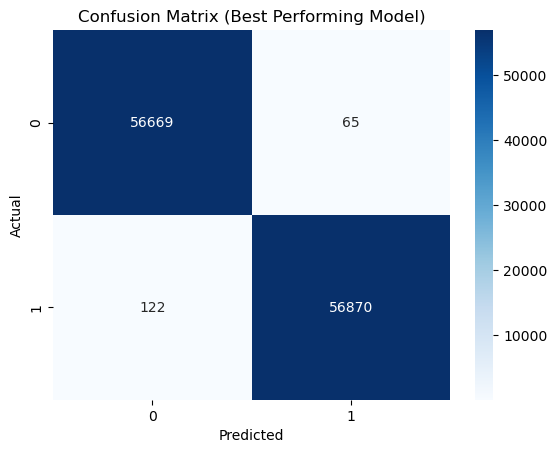

In [15]:
# Display overall model performance
best_max_iter = [100, 500, 1000][accuracy_list.index(max(accuracy_list))]
print(f"Best Max Iterations: {best_max_iter}")
print("Overall Model Performance:")
print(classification_report(y_test, model.predict(X_test)))
print(f"Overall Accuracy: {max(accuracy_list)}")
print(f"Overall Confusion Matrix:\n{conf_matrix_list[accuracy_list.index(max(accuracy_list))]}")

# Plot confusion matrix of the best performing model
plt.figure()
sns.heatmap(conf_matrix_list[accuracy_list.index(max(accuracy_list))], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Performing Model)')
plt.show()